In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# splitting data:
from sklearn.model_selection import train_test_split

# web-based requests
import requests

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

import acquire
import prepare

credentials loaded successfully
End of file.


In [2]:
# Aquire data:

url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
    
df = pd.read_csv(url)    

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
# putting all column headers in lowercase:

df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   day          365 non-null    object 
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   flyers       365 non-null    int64  
 5   price        365 non-null    float64
 6   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((204, 7), (88, 7), (73, 7))

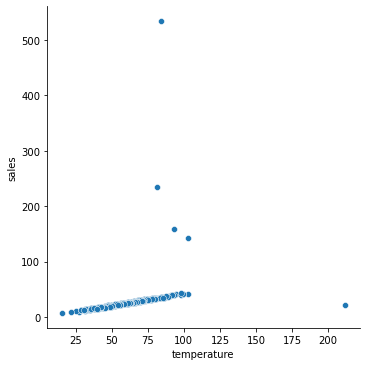

In [7]:
sns.relplot(x='temperature', y='sales', data=df)

In [8]:
df.groupby('day').describe()

temperature                                                     \
                count       mean        std   min     25%    50%     75%   
day                                                                        
Friday           52.0  61.134615  16.184426  25.3  50.225  61.50  71.175   
Monday           52.0  60.888462  17.119610  28.9  49.325  60.65  71.400   
Saturday         52.0  64.021154  26.813308  30.9  48.700  63.45  71.575   
Sunday           53.0  59.769811  17.108136  15.1  49.700  61.10  71.700   
Thursday         52.0  61.125000  15.655518  31.9  50.750  60.35  71.400   
Tuesday          52.0  59.944231  16.498288  22.0  51.625  60.95  72.050   
Wednesday        52.0  61.717308  15.253861  32.2  51.425  62.00  71.175   

                 rainfall            ... price      sales             \
             max    count      mean  ...   75%  max count       mean   
day                                  ...                               
Friday      99.3     52.0  0.817115  ...   0.5  0.5  52.0  25.384615   
Monday     102.6     52.0  0.823462  ...   0.5  0.5  52.0  29.307692   
Saturday   212.0     52.0  0.823077  ...   0.5  0.5  52.0  27.269231   
Sunday      93.4     53.0  0.873585  ...   0.5  0.5  53.0  27.094340   
Thursday    97.9     52.0  0.812500  ...   0.5  0.5  52.0  25.673077   
Tuesday     99.3     52.0  0.829423  ...   0.5  0.5  52.0  34.750000   
Wednesday   94.3     52.0  0.801731  ...   0.5  0.5  52.0  25.596154   

                                                       
                 std   min    25%   50%    75%    max  
day                                                    
Friday      7.010227  11.0  21.00  25.5  29.25   41.0  
Monday     29.913954  12.0  20.75  25.0  30.00  235.0  
Saturday   17.711318  13.0  19.75  25.0  30.00  143.0  
Sunday     19.676484   7.0  19.00  25.0  29.00  158.0  
Thursday    6.729278  13.0  21.00  25.0  30.00   43.0  
Tuesday    70.898125  10.0  21.00  25.0  30.00  534.0  
Wednesday   6.622184  12.0  20.00  25.0  30.00   41.0  

[7 rows x 40 columns]

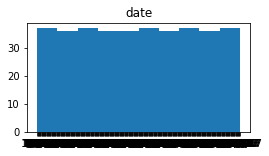

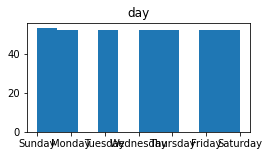

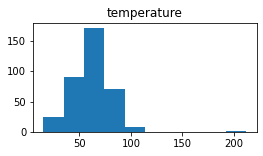

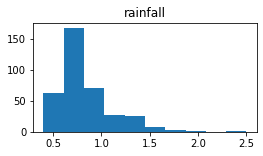

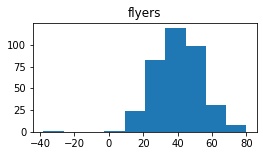

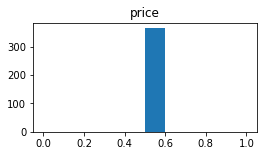

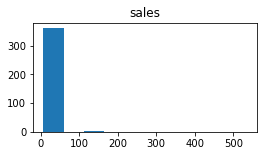

In [9]:
for col in df.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

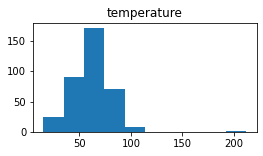

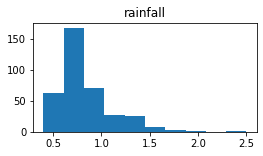

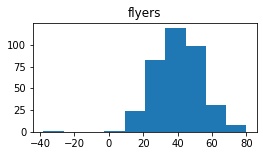

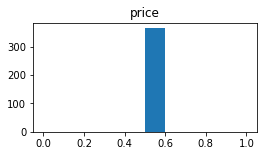

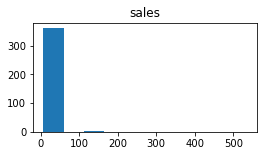

In [10]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plt.figure(figsize = (4, 2))
        plt.hist(df[col])
        plt.title(col)
        plt.show()
    elif df[col].dtype == 'int64':
        plt.figure(figsize = (4, 2))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [11]:
# Or use John's way of getting a list of columns that are the "correct" dtype:

lst = [column for column in df.columns if df[f'{column}'].dtype in ('int64','float64')]

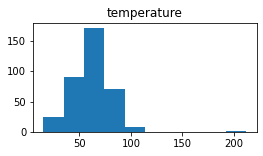

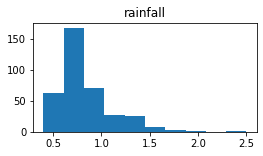

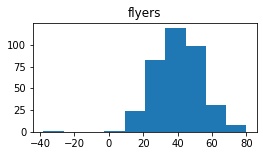

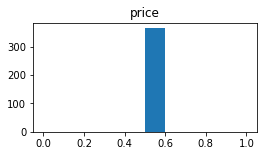

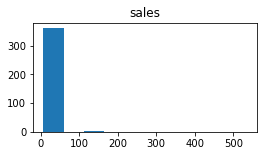

In [12]:
for col in df.columns:
    if df[col].dtype in ('int64','float64'):
        plt.figure(figsize = (4, 2))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

#### Takeaway:

- Looks like temp and rainfall are somewhat normally distributed, but with a skew (due to outliers).
- I should be good using the outlier detection on those columns since they do have a normal(ish) distribution.

# Exercises

### 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
# Splitting the data:

def split_data(df):
    '''
    This function will split a dataframe into 3 dataframes: train, validate and test.
    The random state is set to 123 by default, the validate test_size argument is set to .2, and the test test_size is set to .3.
    '''
    train_validate, test = train_test_split(df, test_size = .2, random_state = 123)
    train, validate = train_test_split(train_validate, test_size = .3, random_state = 123)
    return train, validate, test
    print(train.shape, validate.shape, test.shape)

In [14]:
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((204, 7), (88, 7), (73, 7))

In [15]:
df

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [16]:
df1 = df.copy()
df1.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [17]:
# for example purposes, calculating temp manually just eyeballing the above table:

q1, q3 = df1.temperature.quantile([.25, .75])
iqr = q3 - q1
iqr

22.0

In [18]:
multiplier = 1.5

In [19]:
lower_fence = q1 - multiplier * iqr
lower_fence

16.700000000000003

In [20]:
upper_fence = q3 + multiplier * iqr
upper_fence

104.7

### Doing Temperature step by step
- So I know what I'm doing for when I build my function.

In [21]:
df1.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [22]:
df1.temperature[df1.temperature >= upper_fence]

41    212.0
Name: temperature, dtype: float64

In [23]:
df1.temperature[df1.temperature <= lower_fence].shape

(1,)

In [24]:
df1.temperature >= upper_fence

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Name: temperature, Length: 365, dtype: bool

In [25]:
df1.temperature[-5:]

360    42.7
361    37.8
362    39.5
363    30.9
364    15.1
Name: temperature, dtype: float64

In [26]:
max(10-9, 0)

1

In [27]:
min(10-11, 0)

-1

In [28]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_fence = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_fence, 0]))

In [29]:
def get_lower_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the lower outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the lower bound the observation is.
    '''
    
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_fence = q1 - k * iqr
    return s.apply(lambda x: max([lower_fence - x, 0]))

#### Adding columns for outliers

In [30]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        if not col.endswith('_outliers', -9):
            df[col + '_up_outliers'] = get_upper_outliers(df[col], k)

    return df

In [31]:
def add_lower_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        if not col.endswith('_outliers', (len('_outliers') * -1)):
            df[col + '_low_outliers'] = get_upper_outliers(df[col], k)

    return df

In [32]:
add_upper_outlier_columns(df1, 1.5)

df1.head()

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0


In [33]:
df1.shape

(365, 12)

In [34]:
add_lower_outlier_columns(df1, 1.5)
df1.sample(10)

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
348,12/15/17,Friday,42.1,1.05,30,0.5,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,3/26/17,Sunday,59.5,0.77,39,0.5,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,6/17/17,Saturday,76.3,0.65,47,0.5,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,3/18/17,Saturday,53.9,0.83,32,0.5,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,3/1/17,Wednesday,57.9,0.87,46,0.5,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,6/24/17,Saturday,80.5,0.57,50,0.5,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,2/3/17,Friday,50.3,0.87,25,0.5,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,3/12/17,Sunday,61.5,0.74,47,0.5,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,11/26/17,Sunday,49.7,1.05,30,0.5,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,10/27/17,Friday,62.8,0.71,52,0.5,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df1.shape

(365, 17)

In [36]:
outlier_cols = [col for col in df1 if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df1[col][df1[col] > 0]
    print(data.describe())

~~~
temperature_up_outliers
count      1.0
mean     107.3
std        NaN
min      107.3
25%      107.3
50%      107.3
75%      107.3
max      107.3
Name: temperature_up_outliers, dtype: float64
~~~
rainfall_up_outliers
count    28.000000
mean      0.220357
std       0.256594
min       0.030000
25%       0.030000
50%       0.130000
75%       0.240000
max       1.200000
Name: rainfall_up_outliers, dtype: float64
~~~
flyers_up_outliers
count    2.00000
mean     2.50000
std      2.12132
min      1.00000
25%      1.75000
50%      2.50000
75%      3.25000
max      4.00000
Name: flyers_up_outliers, dtype: float64
~~~
price_up_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price_up_outliers, dtype: float64
~~~
sales_up_outliers
count      4.000000
mean     222.500000
std      182.180314
min       98.000000
25%      109.250000
50%      151.500000
75%      264.750000
max      489.000000
Name: sales_up_outliers, dtype: float6

#### Takeaways:

- The sales, flyers, and rainfall outliers are all most likely due to those columns have a fairly significant skew in their distributions. Looking above at the charts, it is apparent that there is a skew, thus using the IQR Range rule to isoluate outliers will produce a larger number of outliers, compared to a truly normal distribution.

#### Isolating the outliers

- Do these outliers make sense to get rid of or keep?

In [37]:
df1[df1.temperature_up_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,107.3,0.0,0.0,0.0,0.0,107.3,0.0,0.0,0.0,0.0


In [38]:
df1[df1.rainfall_up_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0,0.0,0.13,0.0,0.0,0.0


In [39]:
df1[df1.flyers_up_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
166,6/16/17,Friday,99.3,0.47,77,0.5,41,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
194,7/14/17,Friday,92.0,0.50,80,0.5,40,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [40]:
df1[df1.price_up_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers


In [41]:
df1[df1.sales_up_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,98.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,113.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0.0,0.0,190.0,0.0,0.0,0.0,0.0,190.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0.0,0.0,489.0,0.0,0.0,0.0,0.0,489.0


#### Low Outliers:

In [42]:
df1[df1.temperature_low_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,107.3,0.0,0.0,0.0,0.0,107.3,0.0,0.0,0.0,0.0


In [43]:
df1[df1.rainfall_low_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0,0.0,0.13,0.0,0.0,0.0


In [44]:
df1[df1.flyers_low_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
166,6/16/17,Friday,99.3,0.47,77,0.5,41,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
194,7/14/17,Friday,92.0,0.50,80,0.5,40,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [45]:
df1[df1.price_low_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers


In [46]:
df1[df1.sales_low_outliers != 0]

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,98.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,113.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0.0,0.0,190.0,0.0,0.0,0.0,0.0,190.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0.0,0.0,489.0,0.0,0.0,0.0,0.0,489.0


#### Takeaways:

- Rainfall has a lot of outliers, but that is most likely because rainfall is not normally distributed or has a skew in it's distribution.

In [47]:
# Attempting to print the outlier rows

for col in up_outlier:
    print('~~~\n' + col)
    data = df1[col][df1[col] > 0]
    print(data.head(10))

NameError: name 'up_outlier' is not defined

In [48]:
up_outlier = [col for col in df1.columns if col.endswith('_up_outliers', -12)]
up_outlier

['temperature_up_outliers',
 'rainfall_up_outliers',
 'flyers_up_outliers',
 'price_up_outliers',
 'sales_up_outliers']

### Using 3 as the multiplier

In [49]:
df2 = df.copy()

In [50]:
df2.describe()

,temperature,rainfall,flyers,price,sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [51]:
add_upper_outlier_columns(df2, 3)

df2.head()

,date,day,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.00,0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.00,0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0,0.0,0.0


In [52]:
add_lower_outlier_columns(df2, 3)
df1.shape

(365, 17)

In [53]:
outlier_cols = [col for col in df2 if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df2[col][df2[col] > 0]
    print(data.describe())

~~~
temperature_up_outliers
count     1.0
mean     74.3
std       NaN
min      74.3
25%      74.3
50%      74.3
75%      74.3
max      74.3
Name: temperature_up_outliers, dtype: float64
~~~
rainfall_up_outliers
count    4.000000
mean     0.345000
std      0.321403
min      0.130000
25%      0.130000
50%      0.220000
75%      0.435000
max      0.810000
Name: rainfall_up_outliers, dtype: float64
~~~
flyers_up_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: flyers_up_outliers, dtype: float64
~~~
price_up_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price_up_outliers, dtype: float64
~~~
sales_up_outliers
count      4.000000
mean     207.500000
std      182.180314
min       83.000000
25%       94.250000
50%      136.500000
75%      249.750000
max      474.000000
Name: sales_up_outliers, dtype: float64
~~~
temperature_low_outliers
count     1.0
mea

In [54]:
df2.describe()

,temperature,rainfall,flyers,price,sales,temperature_up_outliers,rainfall_up_outliers,flyers_up_outliers,price_up_outliers,sales_up_outliers,temperature_low_outliers,rainfall_low_outliers,flyers_low_outliers,price_low_outliers,sales_low_outliers
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.0,365.0,365.000000,365.000000,365.000000,365.0,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753,0.203562,0.003781,0.0,0.0,2.273973,0.203562,0.003781,0.0,0.0,2.273973
std,18.085892,0.273890,13.786445,0.0,30.948132,3.889040,0.046314,0.0,0.0,27.230528,3.889040,0.046314,0.0,0.0,27.230528
min,15.100000,0.400000,-38.000000,0.5,7.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,212.000000,2.500000,80.000000,0.5,534.000000,74.300000,0.810000,0.0,0.0,474.000000,74.300000,0.810000,0.0,0.0,474.000000


#### Takeaways:

- Same results as above; but the distance of the outliers is slightly lower as one would expect with a larger multiplier for the standard deviation calculation.

- The `rainfall` 

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

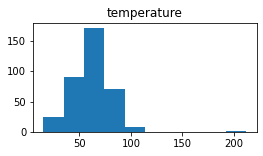

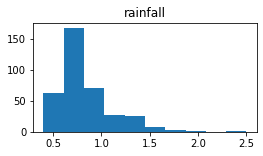

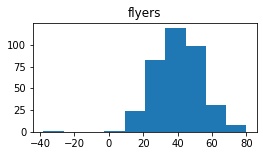

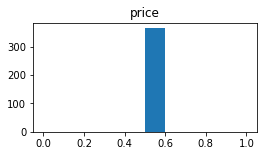

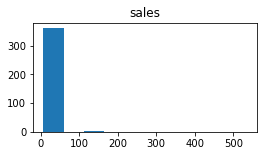

In [58]:
# Showing charts again to isolate which distributions are normal:

for col in df.columns:
    if df[col].dtype in ('int64','float64'):
        plt.figure(figsize = (4, 2))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

##### Result: `temperature`, `rainfall`, and `flyers` are fairly normally distributed (with a skew)

- z-score relies on the distributions being normal.

In [59]:
norm_dist = ['temperature', 'rainfall', 'flyers']

In [ ]:
# Calculate the z-score 
zscores = pd.Series((x - x.mean()) / x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

In [60]:
x = df.temperature
zscores = (x - x.mean()) / x.std()

zdf = pd.DataFrame()
zdf["x"] = x
zdf["zscore"] = abs(zscores)

In [61]:
# Looking first at all values that are 1.5 std. dev from the mean:
zdf[zscores >= 1.5]

,x,zscore
41,212.0,8.336627
154,90.4,1.613155
158,90.7,1.629742
162,93.0,1.756913
166,99.3,2.105251
171,94.3,1.828792
176,102.6,2.287714
180,89.4,1.557863
181,102.9,2.304301
182,93.4,1.779030


In [62]:
# Now looking first at all values that are 2 and 3 std. dev from the mean:
zdf[zscores >= 2]

,x,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


In [63]:
zdf[zscores >= 3]

,x,zscore
41,212.0,8.336627


In [64]:
# Finding the outliers:

# Big thanks to Beth for sharing this cool function she created! Her way is a lot easier than the manual way I was going about it.

def sigma_out(df_column, sigma = 2):
    
    zscore = abs((df_column.mean() / df_column.std()))
    
    up_outlier = (zscore * sigma) + df_column.mean()
    
    low_outlier = (zscore * sigma) - df_column.mean()
    
    return up_outlier, low_outlier

In [66]:
for col in norm_dist:
    
    print(col)
    up_outlier, low_outlier = sigma_out(df[col])
    print("lower bound", low_outlier)
    print("uppder bound", up_outlier, "\n")

temperature
lower bound -54.45422492031442
uppder bound 67.99509014817882 

rainfall
lower bound 5.205439989806705
uppder bound 6.857385195286159 

flyers
lower bound -34.286205005901834
uppder bound 45.922014172180354 

